<a href="https://colab.research.google.com/github/vicabc/sloan-DR14/blob/main/random_forest_ROCcurve_sloanDR14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sloan= pd.read_csv('/content/sloan10')

In [ ]:
#Criamos os índices de cores

sloan['u-g'] = sloan['u'] - sloan['g']
sloan['g-r'] = sloan['g'] - sloan['r']
sloan['r-i'] = sloan['r'] - sloan['i']
sloan['i-z'] = sloan['i'] - sloan['z']

In [ ]:
sloan=sloan.drop(columns=['objid','ra','dec','run','rerun','camcol','field','specobjid','plate','mjd','fiberid','u','g','r','i','z'])

In [ ]:
classes=sloan['class']

OHE = pd.get_dummies(classes)
OHE

,GALAXY,QSO,STAR
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [ ]:
sloan['estrelas']=OHE['STAR']
sloan['galáxias']=OHE['GALAXY']
sloan['qso']=OHE['QSO']
sloan

,class,redshift,u-g,g-r,r-i,i-z,estrelas,galáxias,qso
0,STAR,-0.000009,2.43166,1.09541,0.44357,0.27811,1,0,0
1,STAR,-0.000055,1.44831,0.53812,0.18715,0.09772,1,0,0
2,GALAXY,0.123111,1.19129,0.71741,0.38696,0.28607,0,1,0
3,STAR,-0.000111,1.16264,0.44156,0.17883,0.07795,1,0,0
4,STAR,0.000590,1.28683,-0.17527,-0.11623,-0.05834,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,GALAXY,0.027583,1.34724,0.55545,0.23203,0.17735,0,1,0
9996,GALAXY,0.117772,0.83406,0.36157,0.36031,0.01764,0,1,0
9997,STAR,-0.000402,0.98034,0.25912,0.08570,0.01254,1,0,0
9998,GALAXY,0.014019,0.97219,0.37916,0.16868,0.22296,0,1,0


In [9]:
#Treinamos a máquina para classificar inicialmente estrelas para os 3 labels diferentes

X=sloan[['u-g','r-i']] #label (parâmetros)
X1=sloan[['u-g','r-i','redshift']] #label (parâmetros)
X2=sloan[['u-g','g-r','r-i','i-z']] #label (parâmetros)
y=sloan['estrelas'] #target (objetivo)

#separamos nossos dados em treino e teste

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.3,random_state=42)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size=0.3,random_state=42)

In [10]:
#Importar Modelo de Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

#Criar um classificador gaussiano

clf=RandomForestClassifier()
clf1=RandomForestClassifier()
clf2=RandomForestClassifier()
#Treine o modelo usando os conjuntos de treinamento: y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#Fazemos o mesmo para os outros dois labels 

clf1.fit(X1_train,y1_train)
y1_pred=clf1.predict(X1_test)

clf2.fit(X2_train,y2_train)
y2_pred=clf2.predict(X2_test)

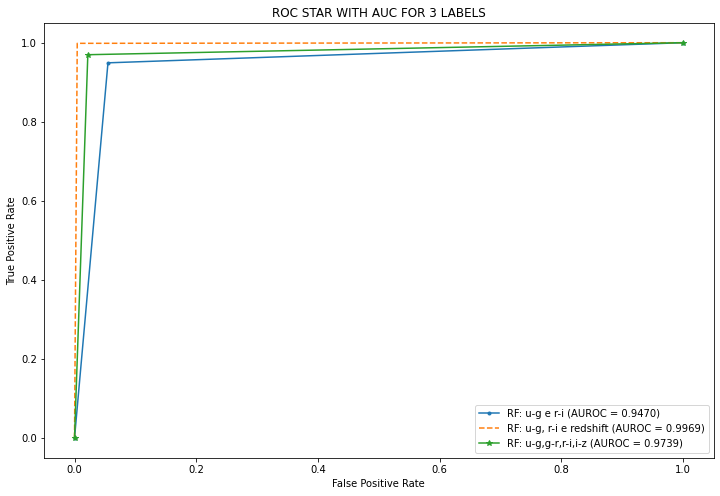

In [14]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# calculate scores

lr_auc = roc_auc_score(y_test, y_pred)
lr_auc1 = roc_auc_score(y1_test, y1_pred)
lr_auc2 = roc_auc_score(y2_test, y2_pred)


# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y1_test, y1_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y2_test, y2_pred)


# plot the roc curve for the model

plt.figure(figsize=(12, 8))

plt.plot(lr_fpr, lr_tpr, marker='.', label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc)
plt.plot(lr_fpr1, lr_tpr1, linestyle='--', label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc1)
plt.plot(lr_fpr2, lr_tpr2, marker='*', label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc2)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC STAR WITH AUC FOR 3 LABELS')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [15]:
X=sloan[['u-g','r-i']] #label (parâmetros)
X1=sloan[['u-g','r-i','redshift']] #label (parâmetros)
X2=sloan[['u-g','g-r','r-i','i-z']] #label (parâmetros)
y2=sloan['galáxias'] #target (objetivo)

#Treinamos o modelo para os 3 labels diferentes

X3_train,X3_test,y3_train,y3_test = train_test_split(X,y2,test_size=0.3,random_state=42)
X4_train,X4_test,y4_train,y4_test = train_test_split(X1,y2,test_size=0.3,random_state=42)
X5_train,X5_test,y5_train,y5_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

In [16]:
#Criar um classificador gaussiano

clf3=RandomForestClassifier()
clf4=RandomForestClassifier()
clf5=RandomForestClassifier()

#Treine o modelo usando os conjuntos de treinamento:

clf3.fit(X3_train,y3_train)
y3_pred=clf.predict(X3_test)

#Fazemos o mesmo para os outros dois labels 

clf4.fit(X4_train,y4_train)
y4_pred=clf4.predict(X4_test)

clf5.fit(X5_train,y5_train)
y5_pred=clf5.predict(X5_test)

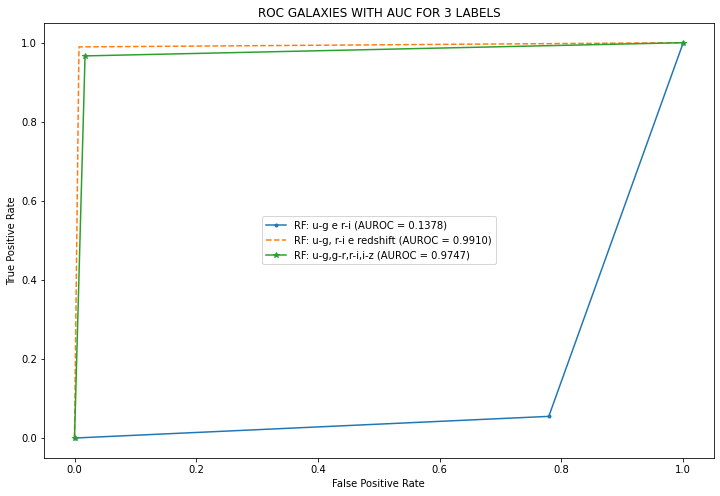

In [17]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# calculate scores

lr_auc3 = roc_auc_score(y3_test, y3_pred)
lr_auc4 = roc_auc_score(y4_test, y4_pred)
lr_auc5 = roc_auc_score(y5_test, y5_pred)


# calculate roc curves

lr_fpr3, lr_tpr3, _ = roc_curve(y3_test, y3_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y4_test, y4_pred)
lr_fpr5, lr_tpr5, _ = roc_curve(y5_test, y5_pred)


# plot the roc curve for the model

plt.figure(figsize=(12, 8))                                                                  

plt.plot(lr_fpr3, lr_tpr3, marker='.', label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc3)
plt.plot(lr_fpr4, lr_tpr4, linestyle='--', label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc4)
plt.plot(lr_fpr5, lr_tpr5, marker='*', label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc5)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC GALAXIES WITH AUC FOR 3 LABELS')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [18]:
X=sloan[['u-g','r-i']] #label (parâmetros)
X1=sloan[['u-g','r-i','redshift']] #label (parâmetros)
X2=sloan[['u-g','g-r','r-i','i-z']] #label (parâmetros)
y3=sloan['qso'] #target (objetivo)

#Treinamos o modelo para os 3 labels diferentes

X6_train,X6_test,y6_train,y6_test = train_test_split(X,y3,test_size=0.3,random_state=42)
X7_train,X7_test,y7_train,y7_test = train_test_split(X1,y3,test_size=0.3,random_state=42)
X8_train,X8_test,y8_train,y8_test = train_test_split(X2,y3,test_size=0.3,random_state=42)

In [19]:
#Criar um classificador gaussiano

clf6=RandomForestClassifier()
clf7=RandomForestClassifier()
clf8=RandomForestClassifier()
#Treine o modelo usando os conjuntos de treinamento

clf6.fit(X6_train,y6_train)
y6_pred=clf6.predict(X6_test)

#Fazemos o mesmo para os outros dois labels 

clf7.fit(X7_train,y7_train)
y7_pred=clf7.predict(X7_test)

clf8.fit(X8_train,y8_train)
y8_pred=clf8.predict(X8_test)

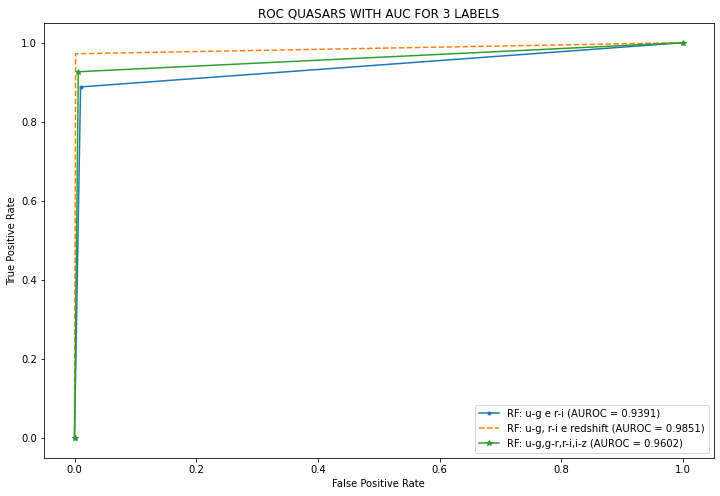

In [20]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# calculate scores

lr_auc6 = roc_auc_score(y6_test, y6_pred)
lr_auc7 = roc_auc_score(y7_test, y7_pred)
lr_auc8 = roc_auc_score(y8_test, y8_pred)


# calculate roc curves

lr_fpr6, lr_tpr6, _ = roc_curve(y6_test, y6_pred)
lr_fpr7, lr_tpr7, _ = roc_curve(y7_test, y7_pred)
lr_fpr8, lr_tpr8, _ = roc_curve(y8_test, y8_pred)


# plot the roc curve for the model

plt.figure(figsize=(12, 8))                                                                  

plt.plot(lr_fpr6, lr_tpr6, marker='.', label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc6)
plt.plot(lr_fpr7, lr_tpr7, linestyle='--', label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc7)
plt.plot(lr_fpr8, lr_tpr8, marker='*', label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc8)


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC QUASARS WITH AUC FOR 3 LABELS')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

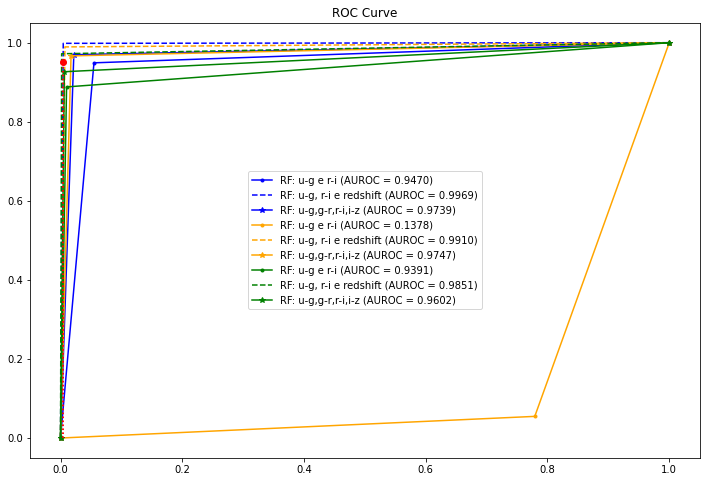

In [24]:
#plotamos todos os modelos treinamos e suas respectivas áreas 

plt.figure(figsize=(12, 8))                                                                  

plt.legend(('STAR', 'GALAXY', 'QSO'))
plt.plot(lr_fpr, lr_tpr, marker='.',color='blue', label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc)
plt.plot(lr_fpr1, lr_tpr1, linestyle='--',color='blue', label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc1)
plt.plot(lr_fpr2, lr_tpr2, marker='*',color='blue', label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc2)
plt.plot(lr_fpr3, lr_tpr3, marker='.', color='orange',label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc3)
plt.plot(lr_fpr4, lr_tpr4, linestyle='--',color='orange', label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc4)
plt.plot(lr_fpr5, lr_tpr5, marker='*',color='orange',label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc5)
plt.plot(lr_fpr6, lr_tpr6, marker='.',color='green', label='RF: u-g e r-i (AUROC = %0.4f)' % lr_auc6)
plt.plot(lr_fpr7, lr_tpr7, linestyle='--', color='green',label='RF: u-g, r-i e redshift (AUROC = %0.4f)' % lr_auc7)
plt.plot(lr_fpr8, lr_tpr8, marker='*', color='green',label='RF: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc8)
pyplot.legend()

plt.plot([4.837e-3, 4.837e-3], [0., 0.9499148211243612], "r:") 
plt.plot([0.0, 4.837e-3], [0.9499148211243612,0.9499148211243612], "r:") #0.9449... é um número estimado através do recall. o concluímos em outra análise
plt.plot([4.837e-3, 4.837e-3], [0.,0.9284049284049284], "r:")

plt.plot([4.837e-3], [0.9499148211243612], "ro")            
plt.title("ROC Curve")                         
plt.show()

In [25]:
listaauc= [lr_auc,lr_auc1,lr_auc2,lr_auc3,lr_auc4,lr_auc5,lr_auc6,lr_auc7,lr_auc8]
#objetos com linhas diferentes no plot dframe.max()
#aqui vemos que a melhor predição feita foi para as estrelas utilizando o label com u-g, r-i e redshift!

In [26]:
rows=[]
for i in range(8):
  listaauc1=listaauc[i]
  rows.append(listaauc1)
  dframe = pd.DataFrame(rows)
dframe.max()
#aqui vemos que a melhor predição feita foi para as estrelas utilizando o label com u-g, r-i e redshift!
#e concluímos que as melhores predições tanto para galáxias quanto quasares também foi utilizando esses 3 labels

0    0.996935
dtype: float64